In [1]:
import numpy as np

Here are some curve-traced figs. It is the *electronic* stopping power. 

In [32]:
def LET_er(e, mode = 'LET', rho = 2.9):
    '''
    Return the LET for this recoil energy for electrons
    PRL 97, 081302
    Mode dEdx: return dE/dx in keV/um
    Mode LET: return LET in MeV cm^2 / g
    '''
    E    = [1,2,3,4,5,6,8,10,20,30,40,50,60,80,100]
    dEdx = [8.5, 7.85, 6.3, 5.5,5,4.5,3.7,3.1,2.0,1.4,1.25,1.05,0.95,0.8,0.7]
    LET = np.array(dEdx) * 10 / rho
    assert len(E) == len(dEdx)
    if mode == 'dEdx':
        return np.interp(e, E, dEdx)
    elif mode == 'LET':
        return np.interp(e, E, LET)
    elif mode == 'dEdx_inv':
        return np.interp(e, dEdx[::-1], E[::-1])
    elif mode == 'LET_inv':
        return np.interp(e, LET[::-1], E[::-1])
    else:
        raise SyntaxError('Mode not understood, got this: ', mode)



In [24]:
def LET_nr(e, mode = 'LET', rho = 2.9, model = 'SRIM'):
    '''
    Return the LET for this recoil energy for electrons
    PRL 97, 081302
    Mode dEdx: return dE/dx in keV/um
    Mode LET: return LET in MeV cm^2 / g
    '''
#     E    = [5,6,8,10,20,30,40,50,60,80,100]
#     dEdx = [83,97,120,140,220,260,300,320,340,390, 420]
    if model == 'SRIM':
        E    = [1,2,3,4,5,6,8,10,20,30,40,50,60,80,100]
        dEdx = [3.8,5.3,6.1,7.3,8.2,9.2,10.5,11.5,17,20.5,23,26,29,33,37]
    elif model == 'hitachi':
        E    = [5,6,8,10,20,30,40,50,60,80,100]
        dEdx = [83,97,120,140,220,260,300,320,340,390, 420]

    LET = np.array(dEdx) * 10 / rho
    assert len(E) == len(dEdx)
    if mode == 'dEdx':
        return np.interp(e, E, dEdx)
    elif mode == 'LET':
        return np.interp(e, E, LET)
    elif mode == 'dEdx_inv':
        return np.interp(e, dEdx, E)
    elif mode == 'LET_inv':
        return np.interp(e, LET, E)
    else:
        raise SyntaxError('Mode not understood, got this: ', mode)

### Lindhard

In [33]:
def L_lind(E, k=0.1394, Z=54):
    '''
    Lindhard quenching factor 
    Enter E in keV
    '''
    return (k * g_lind(E, Z)) / (1 + (k * g_lind(E, Z)))

In [34]:
def g_lind(E, Z):
    return 3 * eps_lind(E, Z)**0.15 + 0.7 * eps_lind(E, Z)**0.6 + eps_lind(E, Z)

In [35]:
def eps_lind(E, Z):
    return 11.5 * E * Z**(-7/3)

In [ ]:
def keV_to_keVee(e):
    # Verzin een list
    if type(e) == list:
        e = np.array(e)
    return e * L_lind(e)

In [54]:
def keVee_to_keV(e):
    # Verzin een list
    if type(e) == list:
        e = np.array(e)
    return e / L_lind(e)

In [41]:
# import matplotlib.pyplot as plt
# %matplotlib inline

In [38]:
# x_plot = np.logspace(0, 2, 50)
# x_plot2 = np.logspace(np.log10(5), 2, 50)
# plt.plot(x_plot, LET_nr(x_plot, mode='dEdx'), label='NR SRIM')
# plt.plot(x_plot, LET_nr(x_plot, mode='dEdx', model='hitachi'), label='NR hit')
# plt.plot(x_plot, LET_er(x_plot, mode='dEdx'), label='ER')
# plt.xscale('log')
# plt.yscale('log')
# plt.legend()

In [39]:
# LET_nr(60, mode='LET', model='hitachi') * 5

In [40]:
#  LET_er(100, mode='LET')

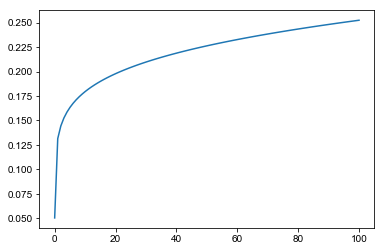

In [49]:
# x_plot = np.linspace(0.001, 100, 100)
# plt.plot(x_plot, L_lind(x_plot))

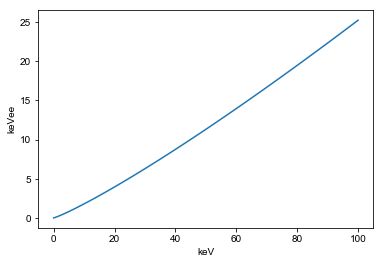

In [52]:
# plt.plot(x_plot, keV_to_keVee(x_plot))
# plt.xlabel('keV')
# plt.ylabel('keVee')

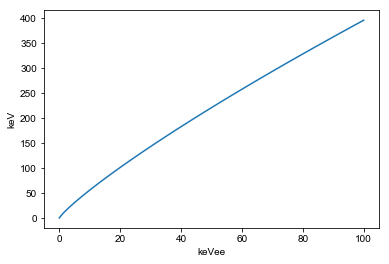

In [53]:
# plt.plot(x_plot, keVee_to_keV(x_plot))
# plt.xlabel('keVee')
# plt.ylabel('keV')